<a href="https://colab.research.google.com/github/Lakshmi-Prasanthi/ML_Projects/blob/main/carsalesprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df= pd.read_csv('/content/car data.csv')
df.shape


(301, 9)

In [ ]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())


['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [ ]:
fd.head()
x=fd.iloc[:,1:]
y=fd.iloc[:,0]

In [ ]:

y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
df.isnull().sum()
df.describe()
df.columns
fd = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
fd.head()
fd['cy'] = 2022
fd['age']=fd['cy']-fd['Year']
fd.head()
fd.drop('Year',axis=1,inplace=True)
fd.drop('cy',axis=1,inplace=True)
fd.columns


Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'age'],
      dtype='object')

In [ ]:
fd=pd.get_dummies(fd)
fd.head()
cm=fd.corr()



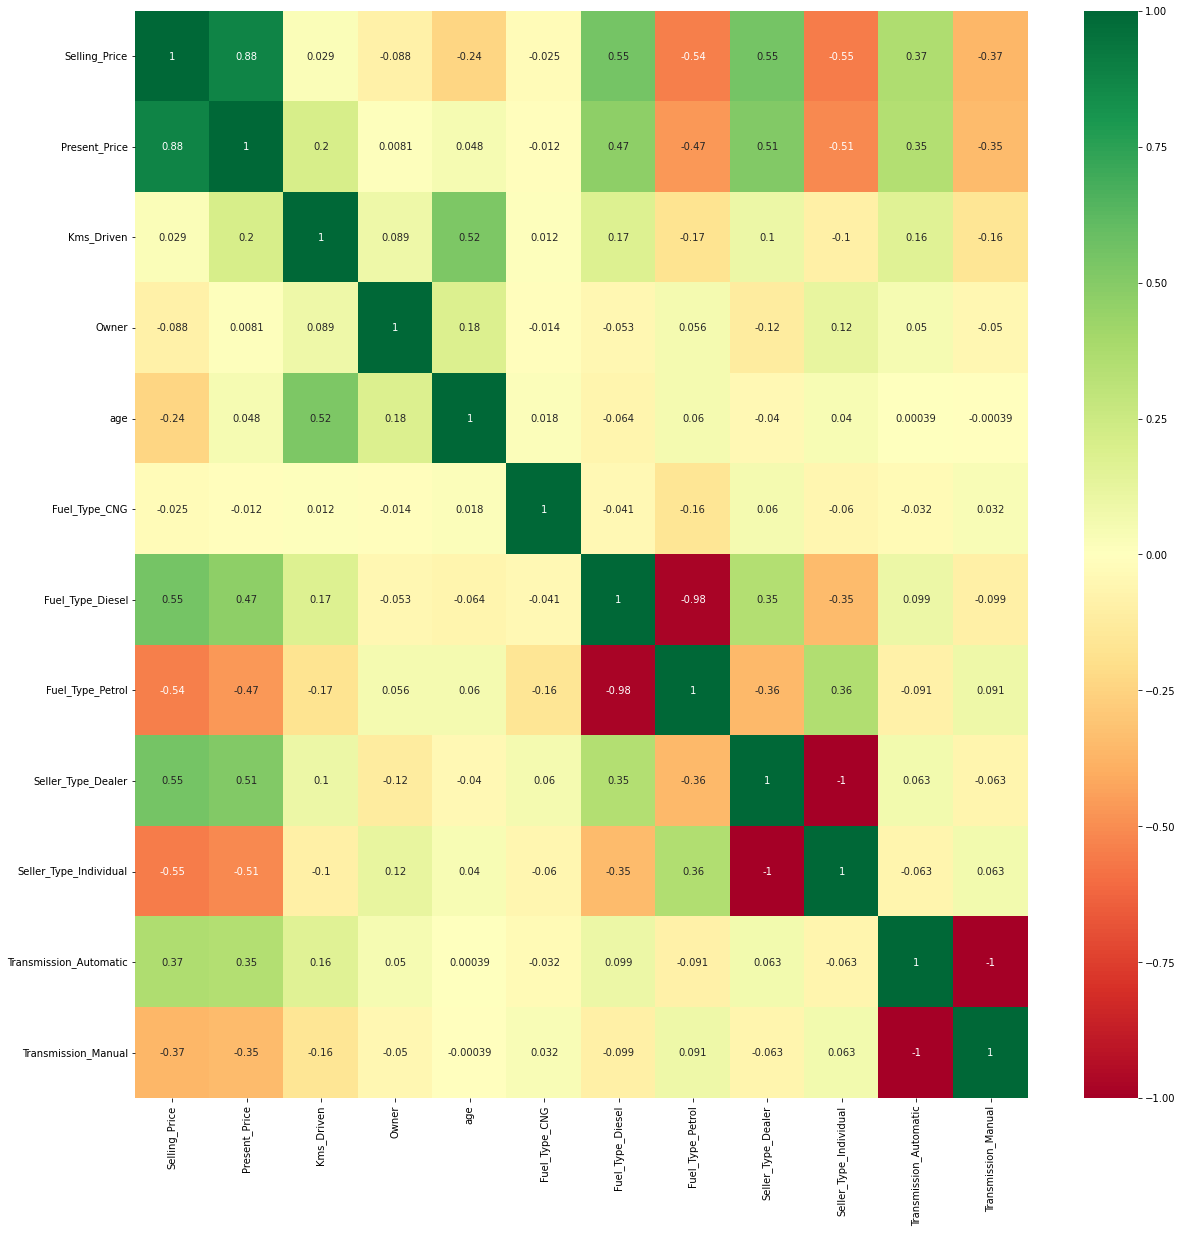

In [ ]:
top=cm.index
plt.figure(figsize=(20,20))
g=sns.heatmap(fd[top].corr(),annot=True,cmap="RdYlGn")

In [ ]:
## feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)


[4.19908603e-01 3.81829382e-02 9.05738322e-04 7.91851868e-02
 8.28573363e-05 1.97903201e-01 1.48000557e-02 1.10597177e-01
 4.18870405e-03 5.31391688e-02 8.11063696e-02]


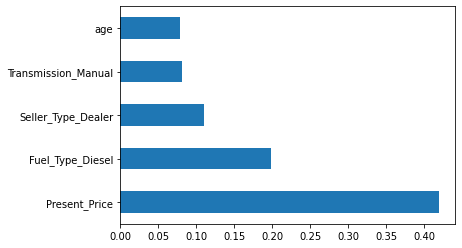

In [ ]:
feat_importances = pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
## Train testsplit
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=10 )
x_train.shape
x_test.shape

(61, 11)

In [ ]:
## Randomforest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
clf = RandomForestRegressor(n_estimators=20)
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_predict ))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
## convert y_predict array to list and list to dictionary of two listsy_predict and y_test
k1=y_predict.tolist()
k2=y_test.tolist()
k = {k1[i] : k2[i] for i in range(0,len(k1))}
k
## this shows that sales prediction error rate is more with n_estimator(DTs)=20
## its important to tune all the hyperparameters.

Mean Absolute Error: 0.6745245901639344
Mean Squared Error: 2.4928912868852464
Root Mean Squared Error: 1.5788892573215028


{0.13000000000000003: 0.2,
 0.16400000000000003: 0.2,
 0.20700000000000002: 0.17,
 0.24849999999999994: 0.2,
 0.24850000000000003: 0.3,
 0.2585: 0.25,
 0.3105000000000001: 0.25,
 0.3444999999999999: 0.52,
 0.3600000000000001: 0.38,
 0.3845: 0.45,
 0.41850000000000015: 0.4,
 0.5129999999999998: 0.42,
 0.5335000000000001: 0.5,
 0.5549999999999999: 0.6,
 0.567: 0.75,
 0.6380000000000001: 0.4,
 0.681: 0.5,
 0.7265: 0.75,
 0.7590000000000002: 0.9,
 0.7790000000000002: 0.75,
 1.0325: 1.05,
 1.1044999999999996: 1.35,
 2.1450000000000005: 1.05,
 2.3449999999999998: 2.1,
 2.4625: 1.35,
 2.577500000000001: 2.55,
 2.6800000000000006: 3.0,
 2.7050000000000005: 2.9,
 2.9975000000000005: 2.85,
 3.1599999999999997: 3.75,
 3.2900000000000005: 3.0,
 3.4565000000000006: 3.51,
 3.65: 4.15,
 4.197500000000001: 3.9,
 4.227500000000001: 4.0,
 4.5: 4.5,
 4.51: 4.65,
 4.6225: 5.75,
 4.700000000000001: 6.0,
 4.945: 3.75,
 5.0649999999999995: 4.4,
 5.11: 5.3,
 5.25: 4.8,
 5.430000000000001: 5.5,
 5.850500000000

hyperparameter selection using randomsearch cv

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf_random.fit(x_train,y_train)
predictions = rf_random.predict(x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


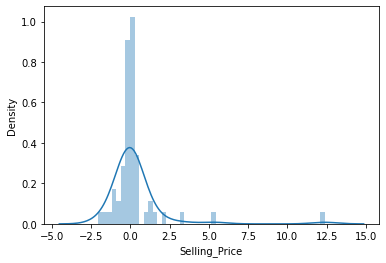

In [ ]:
sns.distplot(y_test - predictions)

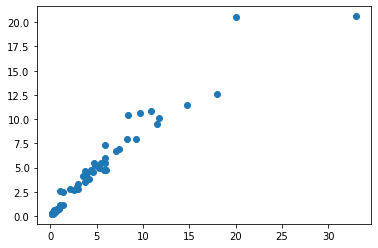

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
import pickle
file =open('RandomForest_Regressormodel.pkl','wb')
## dump information to that file
pickle.dump(rf_random,file)
## Pickle file is a serializable file used for deployment